In [1]:
import pandas as pd
from LR_model import LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
import numpy as np

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
def delete_high_corr_cols(df):
    corr = df.corr()
    high_corr_pairs = []
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            if abs(corr.iloc[i, j]) > 0.8:
                high_corr_pairs.append((corr.columns[i], corr.columns[j]))

    cols_to_drop = []
    for pair in high_corr_pairs:
        cols_to_drop.append(pair[0])
    cols_to_drop = list(set(cols_to_drop))
    df.drop(columns = cols_to_drop, inplace = True)
    return df

# <10 features

In [3]:
# https://archive.ics.uci.edu/dataset/20/census+income
def get_data_adult():
    df = pd.read_csv('data/adult.data', header=None)
    X = df.iloc[:, [0, 2, 4, 10, 11, 12]]
    X = delete_high_corr_cols(X)
    y = [1 if x == ' <=50K' else 0 for x in df.iloc[:, 14]]
    return X, y

In [4]:
# https://archive.ics.uci.edu/dataset/850/raisin
def get_data_raisin():
    df = pd.read_csv('data/Raisin_Dataset.arff', skiprows=18, header=None)
    X = df.iloc[:, :7]
    X = delete_high_corr_cols(X)
    y = [1 if x=='Kecimen' else 0 for x in df.iloc[:, 7]]
    return X, y

In [5]:
# https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik
def get_data_rice():
    df = pd.read_csv('data/Rice_Cammeo_Osmancik.arff', skiprows=16, header=None)
    X = df.iloc[:, :7]
    X = delete_high_corr_cols(X)
    y = [1 if x=='Cammeo' else 0 for x in df.iloc[:, 7]]
    return X, y

## 10+ features

In [6]:
from ucimlrepo import fetch_ucirepo 
# https://archive.ics.uci.edu/dataset/850/raisin
def get_data_wisconsin():
  
    # fetch dataset 
    breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
    
    # data (as pandas dataframes) 
    X = breast_cancer_wisconsin_diagnostic.data.features 
    X = delete_high_corr_cols(X)
    y = breast_cancer_wisconsin_diagnostic.data.targets 
    y = [0 if x == 'B' else 1 for x in np.ravel(y.values)]
    return X, y

In [7]:
# https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
def get_data_cancer():
    df = pd.read_csv('data/wdbc.data', header=None)
    X = df.iloc[:, 2:]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 1]
    y = [1 if x == 'M' else 0 for x in y]
    return X, y

In [8]:
# https://archive.ics.uci.edu/dataset/94/spambase
def get_data_spam():
    df = pd.read_csv('data/spambase.data', header=None)
    X = df.iloc[:, :57]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 57]
    return X, y

In [9]:
# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=1471
def get_data_eeg():
    df = pd.read_csv('data/phplE7q6h.arff', skiprows=37, header=None)
    X = df.iloc[:, :14]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 14]
    y = [0 if x == 1 else 1 for x in y]
    return X, y

In [10]:
# do wywalenia

# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=1053
def get_data_jm1():
    df = pd.read_csv('data/jm1.arff', skiprows=356, header=None)
    X = df.iloc[:, :21]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 21]
    y = [1 if x else 0 for x in y]
    return X, y

In [11]:
# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=59
def get_data_ionosphere():
    df = pd.read_csv('data/dataset_59_ionosphere.arff', skiprows=104, skipfooter=3, header=None)
    X = df.iloc[:, :34]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 34]
    y = [1 if x == 'g' else 0 for x in y]
    return X, y

In [12]:
# https://www.openml.org/search?type=data&status=active&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&sort=runs&id=40701
def get_data_churn():
    df = pd.read_csv('data/churn.arff', skiprows=28, header=None)
    X = df.iloc[:, [0, 1, 3] + [i for i in range(6, 19)]]
    X = delete_high_corr_cols(X)
    y = df.iloc[:, 20]
    return X, y

In [13]:
from ucimlrepo import fetch_ucirepo
def get_data_default():
    default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
    X = default_of_credit_card_clients.data.features 
    X = delete_high_corr_cols(X)
    y = default_of_credit_card_clients.data.targets 
    y = list(np.ravel(y.values))
    return X, y

## 3.4

In [14]:
datasets = {
    'adult': get_data_adult(),
    'raisin': get_data_raisin(),
    'rice': get_data_rice(),
    'default': get_data_default(),
    'cancer': get_data_cancer(),
    'spam': get_data_spam(),
    'eeg': get_data_eeg(),
    #'jm1': get_data_jm1(), has some issues with data
    'churn': get_data_churn(),
    'ionosphere' : get_data_ionosphere()
}
#adult, eeg, churn trudne zbiory

C:\Users\Tomcio\AppData\Local\Temp\ipykernel_21344\983707466.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = cols_to_drop, inplace = True)


C:\Users\Tomcio\AppData\Local\Temp\ipykernel_21344\983707466.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = cols_to_drop, inplace = True)
C:\Users\Tomcio\AppData\Local\Temp\ipykernel_21344\983707466.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = cols_to_drop, inplace = True)
C:\Users\Tomcio\AppData\Local\Temp\ipykernel_21344\2698541372.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('data/dataset_59_ionosphere.arff', skiprows=104, skipf

In [17]:
results = {
    'SGD': {},
    'IWLS': {},
    'ADAM': {},
    'LDA': {},
    'QDA': {},
    'DecTree': {},
    'RandForest': {}
}
n_splits = 5


for dataset in datasets:
    for r in np.random.randint(1, 10000, n_splits):
        
        X_train, X_test, y_train, y_test = train_test_split(datasets[dataset][0], datasets[dataset][1], test_size=0.2, random_state=r)
        
        #logistic reg
        for opt_algorithm in ['SGD', 'IWLS', 'ADAM']:
            model = LR(n_iterations=500, learning_rate=5e-5, tol = 1e-7)
            model.fit(X_train, y_train, optimization_algorithm=opt_algorithm, batch_size=64)
            if results[opt_algorithm].get(dataset) is None:
                results[opt_algorithm][dataset] = 0
            results[opt_algorithm][dataset] += balanced_accuracy_score(y_test, model.predict(X_test)) / n_splits

        #LDA
        model = LinearDiscriminantAnalysis()
        model.fit(X_train, y_train)
        if results['LDA'].get(dataset) is None:
            results['LDA'][dataset] = 0
        results['LDA'][dataset] += balanced_accuracy_score(y_test, model.predict(X_test)) / n_splits

        #QDA
        model = QuadraticDiscriminantAnalysis()
        model.fit(X_train, y_train)
        if results['QDA'].get(dataset) is None:
            results['QDA'][dataset] = 0
        results['QDA'][dataset] += balanced_accuracy_score(y_test, model.predict(X_test)) / n_splits

        #Decision Tree
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        if results['DecTree'].get(dataset) is None:
            results['DecTree'][dataset] = 0
        results['DecTree'][dataset] += balanced_accuracy_score(y_test, model.predict(X_test)) / n_splits

        #Random Forest
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        if results['RandForest'].get(dataset) is None:
            results['RandForest'][dataset] = 0
        results['RandForest'][dataset] += balanced_accuracy_score(y_test, model.predict(X_test)) / n_splits

c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
c:\Users\Tomcio\Documents\AML\AML-project1\LR_model.py:7: RuntimeWarning: overflow encount

<Figure size 1152x864 with 0 Axes>

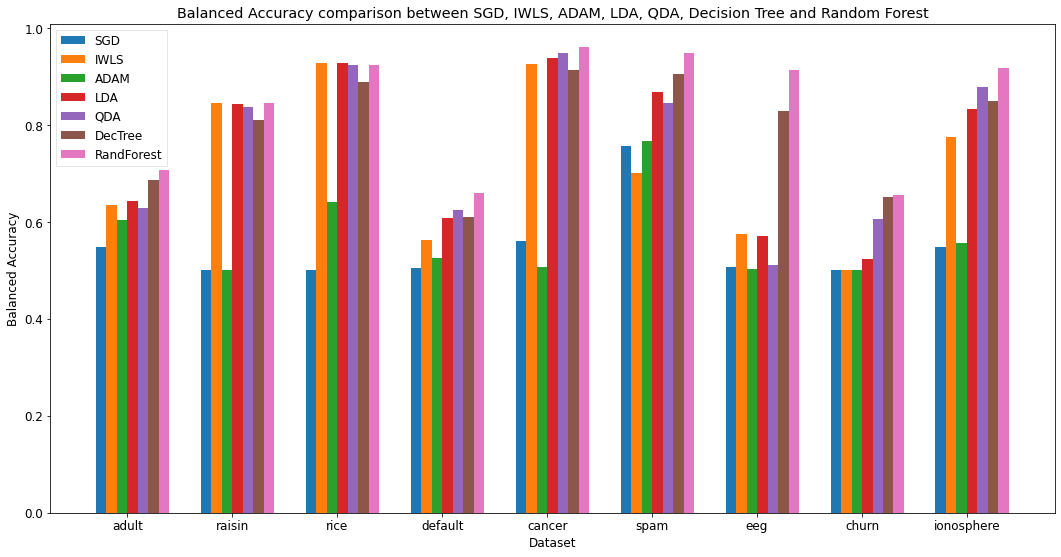

In [31]:
from matplotlib import pyplot as plt
plt.figure(figsize = (16, 12))
plt.rcParams['font.size'] = 12

labels = list(results['SGD'].keys())
SGD_values = list(results['SGD'].values())
IWLS_values = list(results['IWLS'].values())
ADAM_values = list(results['ADAM'].values())
LDA_values = list(results['LDA'].values())
QDA_values = list(results['QDA'].values())
DecTree_values = list(results['DecTree'].values())
RandForest_values = list(results['RandForest'].values())

x = range(len(labels))

# Plotting
plt.figure(figsize=(18, 9))
bar_width = 0.1

plt.bar(x, SGD_values, width=bar_width, label='SGD')
plt.bar([i + bar_width for i in x], IWLS_values, width=bar_width, label='IWLS')
plt.bar([i + bar_width*2 for i in x], ADAM_values, width=bar_width, label='ADAM')
plt.bar([i + bar_width*3 for i in x], LDA_values, width=bar_width, label='LDA')
plt.bar([i + bar_width*4 for i in x], QDA_values, width=bar_width, label='QDA')
plt.bar([i + bar_width*5 for i in x], DecTree_values, width=bar_width, label='DecTree')
plt.bar([i + bar_width*6 for i in x], RandForest_values, width=bar_width, label='RandForest')


plt.xlabel('Dataset')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy comparison between SGD, IWLS, ADAM, LDA, QDA, Decision Tree and Random Forest')
plt.xticks([i + bar_width*2.5 for i in x], labels)
plt.legend(fancybox=False, framealpha=0.5, loc='upper left')
plt.savefig('pictures/task3_4.jpg')
plt.show()